# Practice Lab: Neural Networks for Handwritten Digit Recognition, Binary

*This is a PyTorch implementation of 3-layer NN for handwritten digit classification -- a part of the assignment of ML course **Advanced Learning Algorithms**.*

<a name="1"></a>
## 1 - Packages


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch import nn

%matplotlib inline

<a name="2"></a>
## 2 - Neural Networks

In Course 1, you implemented logistic regression. This was extended to handle non-linear boundaries using polynomial regression. For even more complex scenarios such as image recognition, neural networks are preferred.

<a name="2.1"></a>
### 2.1 Problem Statement

In this exercise, you will use a neural network to recognize two handwritten digits, zero and one. This is a binary classification task. Automated handwritten digit recognition is widely used today - from recognizing zip codes (postal codes) on mail envelopes to recognizing amounts written on bank checks. You will extend this network to recognize all 10 digits (0-9) in a future assignment.

This exercise will show you how the methods you have learned can be used for this classification task.

<a name="2.2"></a>
### 2.2 Dataset

You will start by loading the dataset for this task.
- The `load_data()` function shown below loads the data into variables `X` and `y`


- The data set contains 1000 training examples of handwritten digits $^1$, here limited to zero and one.  

    - Each training example is a 20-pixel x 20-pixel grayscale image of the digit.
        - Each pixel is represented by a floating-point number indicating the grayscale intensity at that location.
        - The 20 by 20 grid of pixels is “unrolled” into a 400-dimensional vector.
        - Each training example becomes a single row in our data matrix `X`.
        - This gives us a 1000 x 400 matrix `X` where every row is a training example of a handwritten digit image.

$$X =
\left(\begin{array}{cc}
--- (x^{(1)}) --- \\
--- (x^{(2)}) --- \\
\vdots \\
--- (x^{(m)}) ---
\end{array}\right)$$

- The second part of the training set is a 1000 x 1 dimensional vector `y` that contains labels for the training set
    - `y = 0` if the image is of the digit `0`, `y = 1` if the image is of the digit `1`.

$^1$<sub> This is a subset of the MNIST handwritten digit dataset (http://yann.lecun.com/exdb/mnist/)</sub>

In [2]:
def load_data():
    X = np.load("data/X.npy")
    y = np.load("data/y.npy")
    X = X[0:1000]
    y = y[0:1000]
    return X, y

In [3]:
# load dataset
X, y = load_data()

<a name="toc_89367_2.2.1"></a>
#### 2.2.1 View the variables
Let's get more familiar with your dataset.  
- A good place to start is to print out each variable and see what it contains.

The code below prints elements of the variables `X` and `y`.  

In [4]:
print ('The first element of X is: ', X[0])

The first element of X is:  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+

In [5]:
print ('The first element of y is: ', y[0,0])
print ('The last element of y is: ', y[-1,0])

The first element of y is:  0
The last element of y is:  1


<a name="toc_89367_2.2.2"></a>
#### 2.2.2 Check the dimensions of your variables

Another way to get familiar with your data is to view its dimensions. Please print the shape of `X` and `y` and see how many training examples you have in your dataset.

In [6]:
print ('The shape of X is: ' + str(X.shape))
print ('The shape of y is: ' + str(y.shape))

The shape of X is: (1000, 400)
The shape of y is: (1000, 1)


<a name="toc_89367_2.2.3"></a>
#### 2.2.3 Visualizing the Data

You will begin by visualizing a subset of the training set.
- In the cell below, the code randomly selects 64 rows from `X`, maps each row back to a 20 pixel by 20 pixel grayscale image and displays the images together.
- The label for each image is displayed above the image

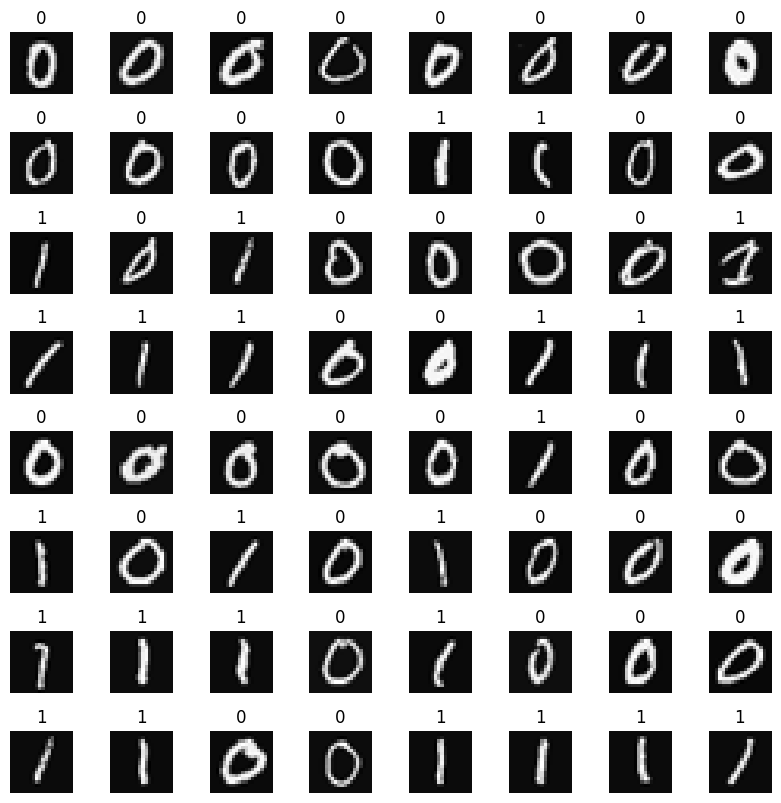

In [7]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# You do not need to modify anything in this cell

m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(8,8))
fig.tight_layout(pad=0.1)

for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)

    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((20,20)).T

    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')

    # Display the label above the image
    ax.set_title(y[random_index,0])
    ax.set_axis_off()

<a name="2.3"></a>
### 2.3 Model representation

The neural network:
- has three layers with sigmoid activations.
-  our inputs are pixel values of digit images.
  - Since the images are of size $20\times20$, this gives us $400$ inputs  
    


- The parameters have dimensions that are sized for a neural network with $25$ units in layer 1, $15$ units in layer 2 and $1$ output unit in layer 3.

    - Recall that the dimensions of these parameters are determined as follows:
        - If network has $s_{in}$ units in a layer and $s_{out}$ units in the next layer, then
            - $W$ will be of dimension $s_{in} \times s_{out}$.
            - $b$ will a vector with $s_{out}$ elements
  
    - Therefore, the shapes of `W`, and `b`,  are
        - layer1: The shape of `W1` is (400, 25) and the shape of `b1` is (25,)
        - layer2: The shape of `W2` is (25, 15) and the shape of `b2` is: (15,)
        - layer3: The shape of `W3` is (15, 1) and the shape of `b3` is: (1,)
>**Note:** The bias vector `b` could be represented as a 1-D (n,) or 2-D (1,n) array. Tensorflow utilizes a 1-D representation and this lab will maintain that convention.
               

<a name="2.4"></a>
### 2.4 PyTorch Model Implementation


<a name="ex01"></a>
### Exercise 1: defining the model in PyTorch

In [8]:
class HandwrittenDigitClassifier(nn.Module):
  def __init__(self):
    super(HandwrittenDigitClassifier, self).__init__()

    self.loss = []
    self.epoch_accuracy = []

    self.linear1 = nn.Linear(400, 25)
    self.sigmoid1 = nn.Sigmoid()
    self.linear2 = nn.Linear(25, 15)
    self.sigmoid2 = nn.Sigmoid()
    self.linear3 = nn.Linear(15, 1)
    self.sigmoid3 = nn.Sigmoid()

    if torch.cuda.is_available():   # Move the model to the GPU (if we have one)
      self.cuda()

  def forward(self, x):
    x = self.linear1(x)
    x = self.sigmoid1(x)
    x = self.linear2(x)
    x = self.sigmoid2(x)
    x = self.linear3(x)
    x = self.sigmoid3(x)
    return x

In [9]:
classifier = HandwrittenDigitClassifier()
print(classifier)

HandwrittenDigitClassifier(
  (linear1): Linear(in_features=400, out_features=25, bias=True)
  (sigmoid1): Sigmoid()
  (linear2): Linear(in_features=25, out_features=15, bias=True)
  (sigmoid2): Sigmoid()
  (linear3): Linear(in_features=15, out_features=1, bias=True)
  (sigmoid3): Sigmoid()
)


The parameter counts shown in the summary correspond to the number of elements in the weight and bias arrays as shown below.

*Let's print parameters of the model.*

**NB:** *In pytorch, the weight vectors are transposed. It means that if we have $n$ datapoints with 400 features ($n*400$), then we will have ($out features * 400$) weights matrix – for the first layer.*


In [10]:
for name, param in classifier.named_parameters():
    print(f'Layer: {name}, Size: {param.size()}')

Layer: linear1.weight, Size: torch.Size([25, 400])
Layer: linear1.bias, Size: torch.Size([25])
Layer: linear2.weight, Size: torch.Size([15, 25])
Layer: linear2.bias, Size: torch.Size([15])
Layer: linear3.weight, Size: torch.Size([1, 15])
Layer: linear3.bias, Size: torch.Size([1])


Define loss function and optimizer for training the model

In [11]:
loss_fn = nn.BCELoss()
optimizer = torch.optim.Adam(classifier.parameters(), lr=0.001)

Define a helper function: batch iterator, since data needs to be processed in batches (and by default, tensorflow uses batches of the size of 32).

In [12]:
def batch_iterator(X, y, batch_size=32):
    """Helper function for iterating over batches of the data"""

    for i in range(0, len(X), batch_size):
      # Convert the NumPy array to a PyTorch tensor to work in PyTorch
      X_ = torch.tensor(X[i:batch_size+i], dtype=torch.float32)
      y_ = torch.tensor(y[i:batch_size+i], dtype=torch.float32)
      if torch.cuda.is_available():
        yield X_.cuda(), y_.cuda()
      else:
         yield X_, y_


Define training function (for one training epoch) for training the model.

**NB**: *in contrast with tensorflow, in PyTorch one can't just use `model.fit` but instead needs to write much more code (but this code is always more or less the same).*

In [13]:
def train_one_epoch(batch_size=32):
    batch_loss = []

    # Iterate simultaneously over inputs and labels
    for i, batch in enumerate(batch_iterator(X, y, batch_size=batch_size)):

        # Get inputs and labels
        inputs, labels = batch

        # Zero your gradients for every batch!
        optimizer.zero_grad()

        # Make predictions for this batch
        outputs = classifier(inputs)

        # Compute the loss and its gradients
        loss = loss_fn(outputs, labels)
        loss.backward()

        # Adjust learning weights
        optimizer.step()

        # Track the loss
        batch_loss.append(loss.item())

    # calculate accuracy: it's not an accuracy for the whole epoch
    # but rather an accuracy of the last batch in the epoch
    output_labels = (outputs >= 0.5)
    accuracy = (output_labels == labels).float().mean().item()
    classifier.epoch_accuracy = accuracy
    # track all the loss in the model
    classifier.loss.extend(batch_loss)

    return sum(batch_loss) / batch_size, accuracy

Train model through epochs


In [14]:
from tqdm import tqdm  # for printing ETA

EPOCHS = 10

batch_size = 32

for epoch in (tqdm_bar := tqdm(range(EPOCHS))):
  classifier.train(True)
  avg_loss_per_epoch, last_accuracy = train_one_epoch(batch_size)
  tqdm_bar.set_description(f"Epoch {epoch+1}/{EPOCHS}; Loss {avg_loss_per_epoch:.4f}; Last Accuracy {last_accuracy:.4f}")
  print()


Epoch 4/10; Loss 0.6330; Last Accuracy 1.0000:  40%|████      | 4/10 [00:00<00:00, 18.48it/s]

Epoch 8/10; Loss 0.4701; Last Accuracy 1.0000:  80%|████████  | 8/10 [00:00<00:00, 17.83it/s]

Epoch 10/10; Loss 0.3862; Last Accuracy 1.0000: 100%|██████████| 10/10 [00:00<00:00, 18.00it/s]

In [15]:
def predict(x: np.array) -> np.array:
  x = torch.tensor(x, dtype=torch.float32)
  if torch.cuda.is_available():
    x = x.cuda()
  classifier.eval()  # set the model to evaluation mode
  with torch.no_grad():  # Disable gradient calculation for inference
      predictions = classifier(x)
  return predictions.numpy()

Let's see what our model predicts.

In [16]:
prediction = predict(X[0])  # a zero
print(f" predicting a zero: {prediction}")
prediction = predict(X[500])  # a one
print(f" predicting a one:  {prediction}")

 predicting a zero: [0.29382735]
 predicting a one:  [0.70111656]


The output of the model is interpreted as a probability. In the first example above, the input is a zero. The model predicts the probability that the input is a one is nearly zero.
In the second example, the input is a one. The model predicts the probability that the input is a one is nearly one.
As in the case of logistic regression, the probability is compared to a threshold to make a final prediction.

In [17]:
if prediction >= 0.5:
    yhat = 1
else:
    yhat = 0
print(f"prediction after threshold: {yhat}")

prediction after threshold: 1


Let's compare the predictions vs the labels for a random sample of 64 digits. This takes a moment to run.

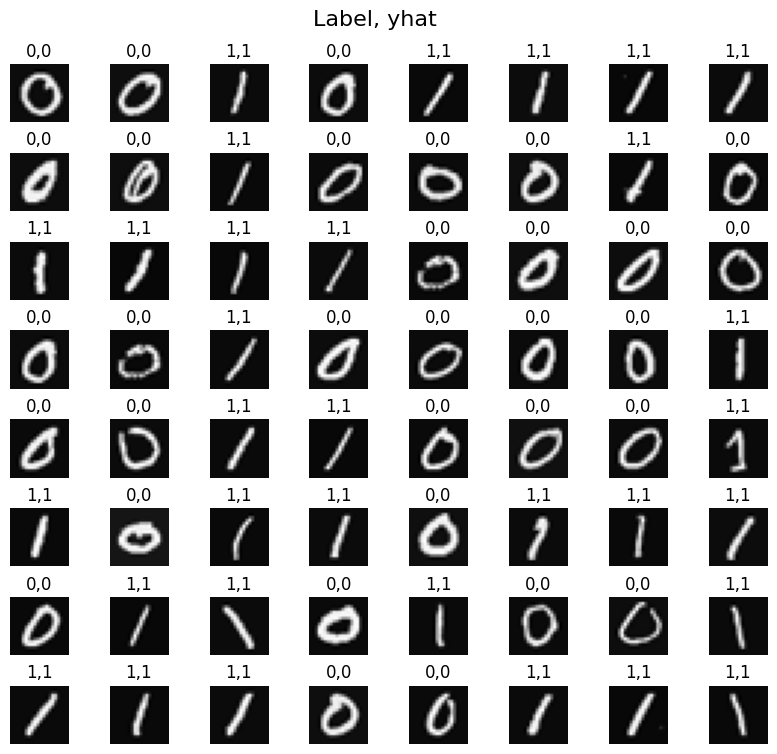

In [18]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# You do not need to modify anything in this cell

m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(8,8))
fig.tight_layout(pad=0.1,rect=[0, 0.03, 1, 0.92]) #[left, bottom, right, top]

for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)

    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((20,20)).T

    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')

    # Predict using the Neural Network
    prediction = predict(X[random_index])
    if prediction >= 0.5:
        yhat = 1
    else:
        yhat = 0

    # Display the label above the image
    ax.set_title(f"{y[random_index,0]},{yhat}")
    ax.set_axis_off()
fig.suptitle("Label, yhat", fontsize=16)
plt.show()